Examen de conocimiento de programación e ingeniería de software
==========================



Daniel Eduardo Vázquez Espinoza
---------------------------------------

---------------
Librerias a utilizar :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se lee el archivo CSV : 

In [93]:
data=pd.read_csv("200511COVID19MEXICO.csv")

Ver las columnas de la tabla:

In [94]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

----------------
1.- Se generara una tabla con 3 columnas:
-------------

a) Fecha

b) Confirmados de SARS-CoV2 en Sonora por fecha usando la fecha
    de inicio de síntomas (no acumulados)

c)Decesos (entre los confirmados) por fecha.

 Se cambiara el formato de la fecha de defuncion para evitar contar "9999-99-99" :

In [99]:
data[['FECHA_DEF']] = data[['FECHA_DEF']].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')


Filtrado para positivos por SARS-Cov2 atendidos en Sonora:

In [105]:
sonora_positivo= data[(data['ENTIDAD_UM'] == 26) & (data['RESULTADO'] == 1)]

Tabla1 dependiendo de la fecha de los sintomas :

In [278]:
sonora_positivo=sonora_positivo.rename(columns={'FECHA_SINTOMAS':'Fecha', 
                                          'FECHA_DEF':'# Defunciones',
                                           'RESULTADO':'# Casos Confirmados'})
tabla1=sonora_positivo.groupby(['Fecha'])[['# Casos Confirmados','# Defunciones']].count()
tabla1.head(5)

,# Casos Confirmados,# Defunciones
Fecha,,
2020-03-11,2,0
2020-03-12,2,0
2020-03-16,2,0
2020-03-17,4,0
2020-03-18,1,0


Convertimos tabla1 a un archico.csv

In [279]:
tabla1.to_csv('tabla1.csv')

-----
 Generar una tabla con la cantidad de casos hospitalizados en los estados de SONORA,CHIHUAHUA,NUEVO LEON y PUEBLA
 ------------------

Se crea un diccionario de las entidades:

In [121]:
codigo_estados= {26:'Sonora',8:'Chihuahua',19:'Nuevo Leon',21:'Puebla'}

Se aplica filtro de estados y pacientes Hospitalizados:

In [180]:
estados_hosp = data[data['ENTIDAD_UM'].isin(codigo_estados) & (data['TIPO_PACIENTE'] == 2)]
#estados_hosp[['ENTIDAD_UM','TIPO_PACIENTE']] #solo para ver que si filtro

Se cuentan los casos por estado:

In [179]:
estados_hosp=estados_hosp.rename(columns={'ENTIDAD_UM':'Estado', 
                                          'TIPO_PACIENTE':'# Casos Hospitalizados'}) 
tabla2=estados_hosp.groupby(['Estado'])[['# Casos Hospitalizados']].count()
tabla2= tabla2.rename(index=codigo_estados)
tabla2

,# Casos Hospitalizados
Estado,
Chihuahua,1013
Nuevo Leon,1089
Puebla,1301
Sonora,549


Se convierte tabla2 a un archivo.csv:

In [182]:
tabla2.to_csv('tabla2.csv')

--------------
Grafica de barras verticales con el numero de casos hospitalizados de SONORA, CHIHUAHUA, NUEVO LEON y PUEBLA.
--------------

Se crea la grafica 1 con base en la tabla2:

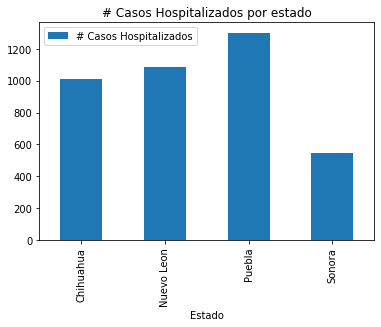

In [265]:
imagen1=tabla2.plot(kind='bar',title="# Casos Hospitalizados por estado")
plt.savefig('grafica1.png') ##Se guarda como grafica1.png
plt.show()


* La grafica 2  sera una serie de tiempo de confirmados a nivel Nacional en el tiempo:

Filtro de los casos confirmados en México:

In [208]:
confirmados= data[(data['RESULTADO'] == 1)]
#confirmados[['FECHA_INGRESO','FECHA_SINTOMAS']] #confirmacion del filtro

Se separan las dos columnas de importancia :

In [272]:
grafica2= confirmados.groupby(['FECHA_SINTOMAS'])[['RESULTADO']].count()
grafica2.head(5)

,RESULTADO
FECHA_SINTOMAS,
2020-01-08,1
2020-01-14,1
2020-01-17,1
2020-01-28,1
2020-01-30,1


Se grafica la serie de tiempo: 

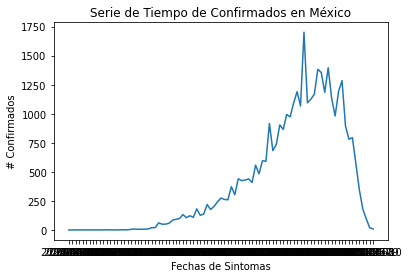

In [271]:
fig, ax = plt.subplots()
ax.plot(grafica2.index, grafica2)
plt.title('Serie de Tiempo de Confirmados en México')
plt.ylabel('# Confirmados')
plt.xlabel('Fechas de Sintomas')
plt.savefig('grafica2.png') ## Se guarda como grafica2.png
plt.show()
